## 1 a) Use Pandas to load the data and report the number of data points (rows) in the training
## set and the test set, respectively.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
df_train=pd.read_csv("./Downloads/trndata.csv")

In [107]:
df_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,L
0,0.3315,0.2156,0.6802,0.1434,0.6825,0.2720,0.6223,0.2092,0.7961,0.1530,0.5856,0.2573,1
1,0.0939,1.0089,0.0365,0.6944,0.0908,0.4961,0.0722,0.6521,-0.0130,0.6085,0.0631,0.6597,2
2,0.5184,0.2283,0.5300,0.6884,0.7456,0.6171,0.6136,0.5928,0.7678,0.6130,0.6705,0.5202,1
3,0.4208,0.6740,0.1651,0.7592,0.1810,0.5448,0.1707,0.7554,0.1635,0.5492,0.2598,0.6455,2
4,0.3130,0.6465,0.5908,0.6924,0.7664,0.6262,1.7177,0.0150,0.0851,1.9046,-0.0165,0.0221,3


In [524]:
df_test=pd.read_csv("./Downloads/tstdata.csv")

In [525]:
df_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,L
0,0.5803,0.4980,0.8809,0.8215,1.0133,0.9187,0.8508,0.8496,0.9996,0.9670,0.9111,0.7814,1
1,0.0026,0.6084,0.2808,0.6282,0.2995,0.7513,-0.0107,1.7503,-0.0622,2.0704,-0.0999,0.1214,3
2,-0.0115,1.1193,0.2201,1.3189,0.2656,1.4039,-0.0067,1.7438,0.0013,2.0020,-0.0401,1.7797,3
3,-0.0536,1.0370,0.0558,1.2483,0.2640,1.1456,0.0140,1.7156,0.0125,1.9889,-0.0598,0.0709,3
4,0.5021,0.4270,0.6450,0.8325,0.7560,0.9235,0.7289,0.7352,0.7735,0.9298,0.6013,0.8842,1


In [110]:
df_train.shape

(1000, 13)

In [111]:
df_test.shape

(300, 13)

### b) Report the number of features in the dataset and the number of data points in each class for the training set and the test set, separately.

In [112]:
df_train['L'].value_counts()

1    343
3    341
2    316
Name: L, dtype: int64

In [113]:
df_test['L'].value_counts()

3    104
2     98
1     98
Name: L, dtype: int64

######  Number of features :3 (1,2 and 3)
#### Train set
        Features   No of data point
           1            343
           2             316
           3             341    
           
    ### Test set
           Features   No of data point
           1           98
           2             98
           3             104    
           

## C) Do random permutations for the training data using the function, shuffle, from
## sklearn.utils. You must set a value for the parameter, random_state. Save the data
## as Training_set_I.

In [114]:
from sklearn.utils import shuffle
Training_set_I=shuffle(df_train,random_state=14)


## d )Show one scatter plot for the training set, that is, one feature against another feature. It is your choice which two features you want to use in the scatter plot. 

<function matplotlib.pyplot.show(close=None, block=None)>

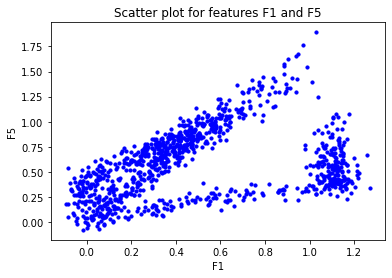

In [115]:
plt.scatter(df_train['F1'], df_train['F5'], s=10, c='b', marker="o", label='first')
plt.xlabel('F1')
plt.ylabel('F5')
plt.title('Scatter plot for features F1 and F5')
plt.show

# Task 2


###  Perform principal component analysis (PCA) on the training set Using Scikit-Learn

#### a. Perform a PCA analysis on Training_set_I.

In [351]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Training_set_I)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
principalDf

,PC1,PC2
0,1.147708,-0.300213
1,0.418048,0.140978
2,0.830607,-0.878652
3,0.927197,0.323086
4,1.465391,-0.935471
...,...,...
995,0.783644,0.695341
996,-1.674469,-0.905491
997,0.336617,1.493998
998,0.395219,0.160978


In [381]:
finalDf = pd.concat([principalDf, Training_set_I[['L']]], axis = 1)



#### b. Plot the data in the first principal component (PC1) and the second principal component
#### (PC2) space and label/colour the data in the picture according to their class labels

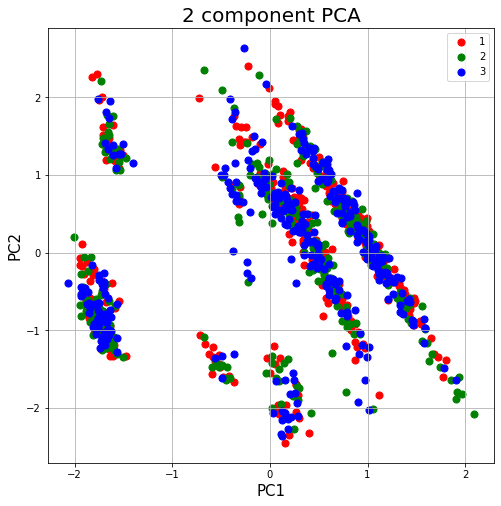

In [384]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,2,3]
colors = ['r','g','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['L'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### c. Report the variance captured by each principal component and generate a scree plot. 

In [344]:
pca.explained_variance_ratio_

array([0.344297 , 0.2977865])

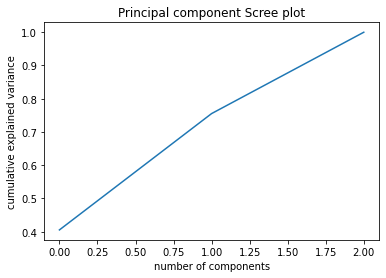

In [345]:
pca = PCA().fit(finalDf)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Principal component Scree plot')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


#### d. Plot two subplots in one figure:

In [385]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_data=finalDf.head(700)

test_data=finalDf.tail(300)

### one for projecting the training set in the PC1 and PC2 project space, where the training data should be labelled using different colours in the picture according its class;

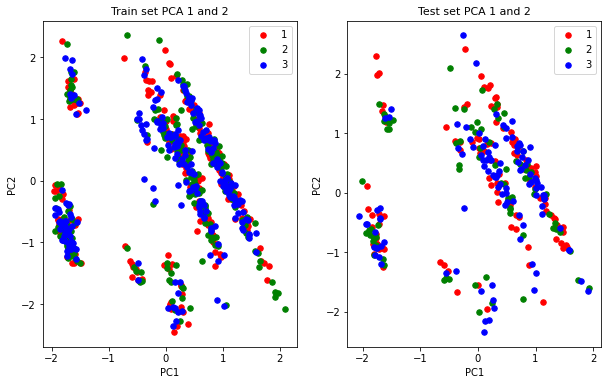

In [425]:
fig =fig = plt.figure(figsize=(10,6))
ax = fig.subplots(nrows=1,ncols=2) 

i=0;
for cols in ax:
   
    targets = [1,2,3]
    colors = ['r','g','b']
    if i==0:
        cols.set_xlabel('PC1', fontsize = 10)
        cols.set_ylabel('PC2', fontsize = 10)
        cols.set_title('Train set PCA 1 and 2', fontsize = 11)
        for target, color in zip(targets,colors):
            indicesToKeep = train_data['L'] == target
            cols.scatter(train_data.loc[indicesToKeep, 'PC1']
                       , train_data.loc[indicesToKeep, 'PC2']
                       , c = color
                       , s = 30)
            cols.legend(targets)
    else:
         cols.set_xlabel('PC1', fontsize = 10)
         cols.set_ylabel('PC2', fontsize = 10)
         cols.set_title('Test set PCA 1 and 2', fontsize = 11)
         for target, color in zip(targets,colors):
            indicesToKeep = test_data['L'] == target
            cols.scatter(test_data.loc[indicesToKeep, 'PC1']
                       , test_data.loc[indicesToKeep, 'PC2']
                       , c = color
                       , s = 30)
            cols.legend(targets)
    i+=1
plt.show()

## Task 3: Divide the whole training set into a smaller training set (II) and a validation set

#### a. Take out the last 300 rows from Training_set_I and save them as the validation set

In [426]:
val_set=Training_set_I.tail(300)


#### b. Save the rest of rows in Training_set_I as the smaller training set (Training set II).

In [429]:
Training_set_II=Training_set_I.head(700)


## Task 4: Investigate how the number of features in the training dataset affects the model
## performance on the validation set 

## a)  Use Training set II to train D simple linear regression models, with D different feature sets

In [443]:
from sklearn.linear_model import LinearRegression
X=Training_set_II.drop('L', axis=1)
Y=Training_set_II['L']


 ### D=1

In [439]:

d1 = LinearRegression().fit(X.iloc[:, 0:1], Y)

## D= 4

In [440]:
## Usimg F1 F2 F3
d4 = LinearRegression().fit(X.iloc[:, 0:4], Y)

## D= 8

In [441]:
## Usimg F1 F2 F3
d8 = LinearRegression().fit(X.iloc[:, 0:8], Y)

## D= 12


In [442]:
## Usimg F1 F2 F3
d12 = LinearRegression().fit(X.iloc[:, 0:12], Y)

### b) Produce a learning curve of the number of features used against the performance measurements. The performance should be measured on both Training set II and the validation set.


Using accuracy as performance metric

In [493]:
from sklearn.metrics import accuracy_score
X_val=val_set.drop('L', axis=1)
Y_val=val_set['L']


In [481]:
models=[d1,d4,d8,d12]
i=1
train_preds=[]
val_preds=[]
for model in models:
    preds=model.predict(X.iloc[:, 0:i])
    train_preds.append(preds)
    preds=model.predict(X_val.iloc[:, 0:i])
    val_preds.append(preds)
    if i==1:
        i=4
    else:
        i+=4
 

In [483]:
val_preds= np.array(val_preds).round(0).astype(int)
train_preds= np.array(train_preds).round(0).astype(int)
val_preds

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [1, 2, 1, ..., 1, 2, 1],
       [1, 2, 1, ..., 1, 2, 1]])

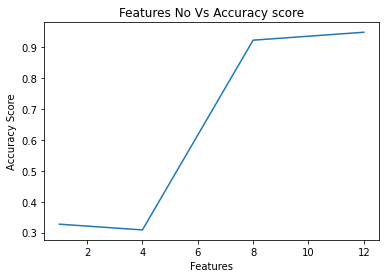

In [491]:
acc=[]
for each in train_preds:
    acc.append(accuracy_score(Y, each))
    
   
features = [1,4,8,12]

  
plt.plot(features, acc)
plt.title('Features No Vs Accuracy score')
plt.xlabel('Features')
plt.ylabel('Accuracy Score')
plt.show()

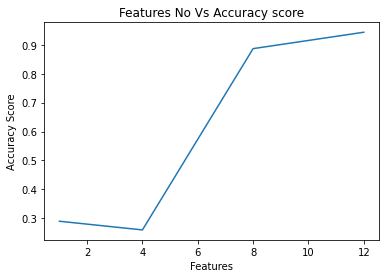

In [492]:
acc=[]
for each in val_preds:
    acc.append(accuracy_score(Y_val, each))
    
   
features = [1,4,8,12]

  
plt.plot(features, acc)
plt.title('Features No Vs Accuracy score')
plt.xlabel('Features')
plt.ylabel('Accuracy Score')
plt.show()

## c) State the optimal number of features that should be used in this work and explain why you choose it. This should all be written in your Jupyter notebook.

The optimal number of features to be used in training the model should be 12 since it gives us the best performance of 90% + hence the model learns well with all the feratures

## d) Use the selected number of features to train the model using Training_set_I and report the performance on the test set

In [539]:
model = LinearRegression().fit(Training_set_I.iloc[:, 0:12], Training_set_I['L'])

preds=model.predict(df_test.iloc[:, 0:12]).round(0)

accuracy_score(df_test['L'], preds)

0.9433333333333334

Accuracy score is now 94% 

## Task 5: Summarise your findings

### a 
    
The number of rows in in training set is 1000 and 13 columns having the last 'L' column as the target variable with 3 classes (1,2, and 3)

Secondly as the number of princioal components increase. The cummulative variance also increase on the PCA analysis

I found out that the more the features used to train or fit the model, the better it's petrformance increases. The performance increases as the number of features increases. This is because the model is able to learn more of the number of features
### b

There is no experimental design problem in task 4. 

In [544]:
import os

os.listdir("./")

['.bash_history',
 '.conda',
 '.condarc',
 '.config',
 '.gitconfig',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.nbi',
 '.vscode',
 '3D Objects',
 'anaconda3',
 'AppData',
 'Application Data',
 'Assignment 2.ipynb',
 'Assisgnment.ipynb',
 'Automobile_Data.ipynb',
 'Classification.ipynb',
 'Clustering-IBM.ipynb',
 'Contacts',
 'Cookies',
 'Creative Cloud Files',
 'Desktop',
 'Diabetes.ipynb',
 'Documents',
 'Downloads',
 'Favorites',
 'Final-Automobile data.ipynb',
 'IBM 1 on 1.ipynb',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'Movies',
 'Music',
 'My Documents',
 'MyFile.txt',
 'MyFile2.txt',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TM.blf',
 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Pictures',
